Autoencoder

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
Reshape, LeakyReLU as LR,\
Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Model, Sequential

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
InputModel = Input(shape=(28,28))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(28, activation='sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 dense (Dense)               (None, 28, 32)            928       
                                                                 
 dense_1 (Dense)             (None, 28, 28)            924       
                                                                 
Total params: 1,852
Trainable params: 1,852
Non-trainable params: 0
_________________________________________________________________


In [5]:
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
history = AutoencoderModel.fit(x_train, x_train,

batch_size=256,
epochs=100,
shuffle=True,
validation_data=(x_test, x_test))

# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(x_test)

Epoch 1/100
235/235 [==============================] - 10s 32ms/step - loss: 0.6947 - val_loss: 0.6945
Epoch 2/100
235/235 [==============================] - 6s 27ms/step - loss: 0.6941 - val_loss: 0.6938
Epoch 3/100
235/235 [==============================] - 6s 26ms/step - loss: 0.6933 - val_loss: 0.6930
Epoch 4/100
235/235 [==============================] - 6s 23ms/step - loss: 0.6925 - val_loss: 0.6921
Epoch 5/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6916 - val_loss: 0.6912
Epoch 6/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6906 - val_loss: 0.6902
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.6897 - val_loss: 0.6892
Epoch 8/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6887 - val_loss: 0.6882
Epoch 9/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6876 - val_loss: 0.6871
Epoch 10/100
235/235 [==============================] - 3s 13ms/step - loss: 0.68

In [7]:
DecodedDigits = AutoencoderModel.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [8]:
def plotmodelhistory(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Autoencoder Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

dict_keys(['loss', 'val_loss'])


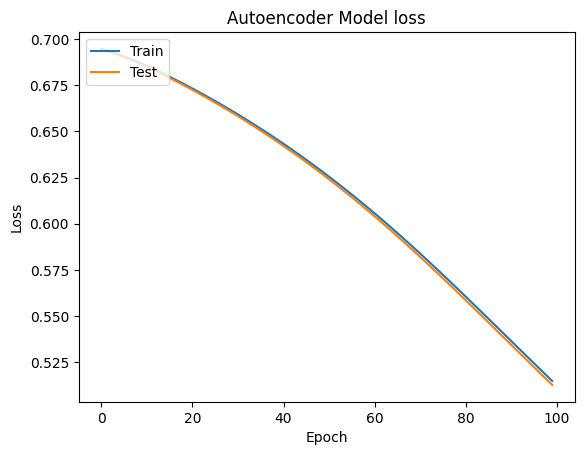

In [9]:
# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

In [10]:
# Acquire MNIST data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
# Reshape data for an MLP input
import numpy as np
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

In [12]:
# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

In [14]:
input_dim = 28*28
latent_vec_dim = 16
input_layer = Input(shape=(input_dim,))

In [15]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(latent_vec_dim, activation='tanh')(input_layer)
encoder = enc_layer_1
# Then build the decoder
dec_layer_1 = Dense(input_dim, activation='sigmoid')(encoder)
decoder = dec_layer_1
# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder)
# Latent representation (Optional)
latent_model = Model(input_layer, encoder)
# Get summary
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
history = autoencoder.fit(train_images, train_images, epochs=70,
validation_data=(test_images, test_images))

Epoch 1/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2829 - val_loss: 0.2633
Epoch 2/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2632 - val_loss: 0.2627
Epoch 3/70
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - val_loss: 0.2378
Epoch 4/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2333 - val_loss: 0.2294
Epoch 5/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2273 - val_loss: 0.2165
Epoch 6/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2042 - val_loss: 0.1955
Epoch 7/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1909 - val_loss: 0.1858
Epoch 8/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1823 - val_loss: 0.1761
Epoch 9/70
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1729 - val_loss: 0.1688
Epoch 10/70
1875/1875 [==============================] - 5s 3ms/step - loss: 0.165

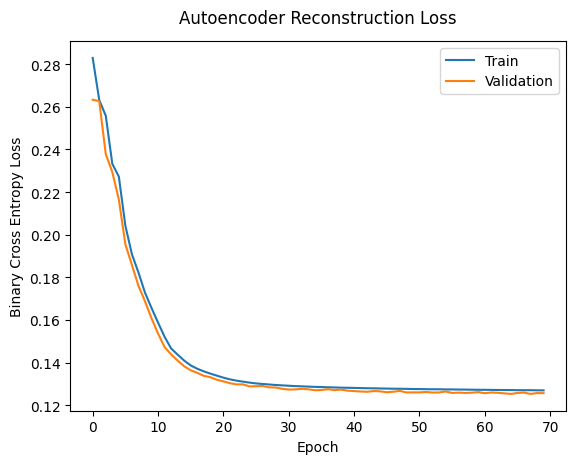

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

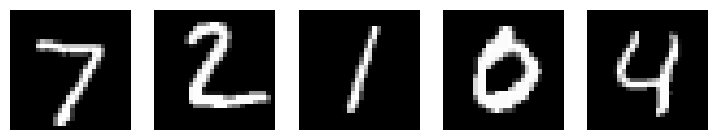

In [19]:
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

313/313 [==============================] - 0s 1ms/step


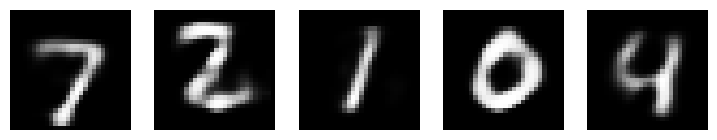

In [20]:
# Testing the model by reconstructing
reconstructed_images = autoencoder.predict(test_images)

n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

CNN BASED AUTOENCODER

In [21]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
autoencoder.fit(x_train, x_train,
epochs=2,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Epoch 1/2
235/235 [==============================] - 182s 766ms/step - loss: 0.1413 - val_loss: 0.0830
Epoch 2/2
235/235 [==============================] - 171s 729ms/step - loss: 0.0797 - val_loss: 0.0763


313/313 [==============================] - 6s 20ms/step


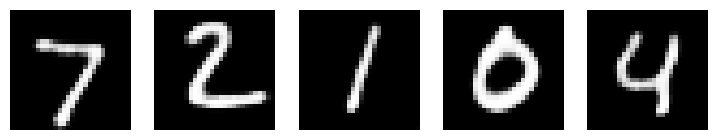

In [24]:
reconstructed_images = autoencoder.predict(x_test)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()

NOISE AUTOENCODER

In [25]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

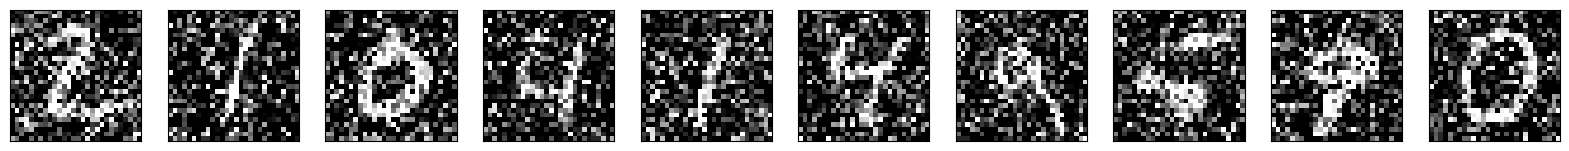

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
  ax = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
autoencoder.fit(x_train_noisy, x_train,

epochs=2,
batch_size=256,
shuffle=True,
validation_data=(x_test_noisy, x_test))

Epoch 1/2
235/235 [==============================] - 180s 766ms/step - loss: 0.1378 - val_loss: 0.1166
Epoch 2/2
235/235 [==============================] - 181s 769ms/step - loss: 0.1157 - val_loss: 0.1129


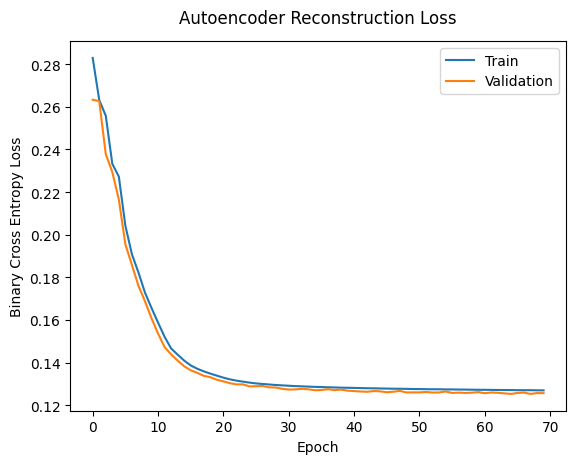

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

313/313 [==============================] - 10s 33ms/step


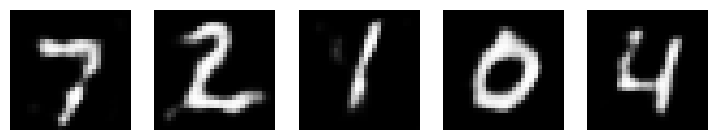

In [31]:
 reconstructed_images = autoencoder.predict(x_test_noisy)
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')
plt.show()